In [1]:
import sys as sys 
sys.path.append('..')

import numpy as np 
import pandas as pd
from ModelTools.model.regression import Regression


In [41]:
n = 500
rng = np.random.default_rng(0)
x1 = rng.normal(size=n,loc=0,scale=3)
x2 = rng.normal(size=n,loc=0,scale=3)
y = rng.normal(loc=np.cos(x2),scale=1)
df = pd.DataFrame(data={'x1':x1,'x2':x2,'y':y,'ts':pd.date_range(start='2000-01-01',periods=n,freq='min')})

# print(df)

m = Regression(data=df,col_x=['x2'],col_y='y',col_ts='ts',ts_freq='min',exp_model=False)
m.fit(base=['lm'])

100%|██████████| 16/16 [00:02<00:00,  6.57it/s]

Best Model(CV)   : sp_std_HUBER 
Hyperparameters  : sp__extrapolation=constant, sp__knots=uniform 
Train Test Split : test_size=0.3, shuffle=False, random_state=0 
Cross Validation : KFold(n_splits=5, random_state=0, shuffle=True) 
 
           R2     MSE     MAE      MBE    MdAE    MAPE    MaxE     SAE    SAPE
-----  ------  ------  ------  -------  ------  ------  ------  ------  ------
Train  0.3323  1.0046  0.7998  -0.0067  0.7112  2.0208  3.221   0.6041  5.4847
Test   0.32    1.0457  0.8298  -0.0496  0.6844  2.0038  2.4627  0.5975  6.8933 
 
Regression.MetricTrain : 模型在训练集上的效果评价 
Regression.MetricTest  : 模型在测试集上的效果评价 
Regression.ExpResid    : 基于模型的残差解释 
Regression.ExpMod      : 基于模型的特征解释 



In [42]:
m.fit_final_model()

Final Model : sp_std_HUBER 
                  R2     MSE     MAE     MBE    MdAE    MAPE    MaxE     SAE    SAPE
------------  ------  ------  ------  ------  ------  ------  ------  ------  ------
Train & Test  0.2196  1.1837  0.8489  0.0069    0.72  1.9125  5.7094  0.6804  5.1856


In [43]:
x = m.predict_ci(n_bootstrap=10000)

100%|██████████| 10000/10000 [00:31<00:00, 317.30it/s]


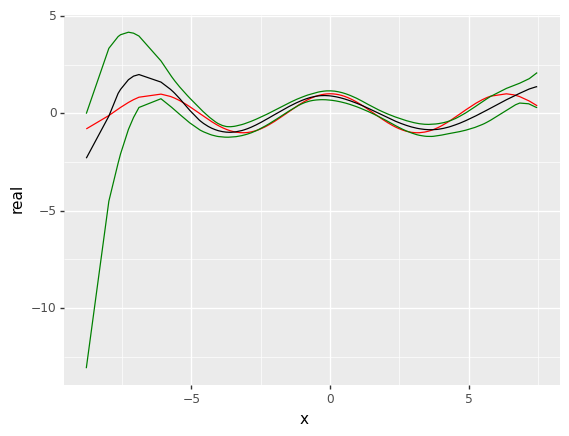

<ggplot: (401218795)>

In [46]:
import plotnine as gg
(
    pd.DataFrame(x)
    .assign(x=x2,mean=m.predict(),real=np.cos(x2))
    .pipe(gg.ggplot)
    +gg.aes(x='x')
    +gg.geom_line(gg.aes(y='real'),color='red')
    +gg.geom_line(gg.aes(y='median'))
    +gg.geom_line(gg.aes(y='down'),color='green')
    +gg.geom_line(gg.aes(y='high'),color='green')
)